In [1]:
import os
base_dir = r'C:\Users\lola1\Downloads\PetImages\base_dir'
train_dir = os.path.join(base_dir, 'train_dir')
test_dir = os.path.join(base_dir, 'test_dir')
validation_dir = os.path.join(base_dir, 'validation_dir')

In [2]:
train_cats_dir = os.path.join(train_dir, 'train_cats_dir')
train_dogs_dir = os.path.join(train_dir, 'train_dogs_dir')
validation_cats_dir = os.path.join(validation_dir, 'validation_cats_dir')
validation_dogs_dir = os.path.join(validation_dir, 'validation_dogs_dir')
test_dogs_dir = os.path.join(test_dir, 'test_dogs_dir')
test_cats_dir = os.path.join(test_dir, 'test_cats_dir')

In [3]:
print('Total gatos entrenamiento:', len(os.listdir(train_cats_dir)))
print('Total perros entrenamiento:', len(os.listdir(train_dogs_dir)))
print('Total perros validacion:', len(os.listdir(validation_dogs_dir)))
print('Total gatos validacion:', len(os.listdir(validation_cats_dir)))
print('Total perros test:', len(os.listdir(test_dogs_dir)))
print('Total gatos test:', len(os.listdir(test_cats_dir)))


Total gatos entrenamiento: 1000
Total perros entrenamiento: 1000
Total perros validacion: 500
Total gatos validacion: 500
Total perros test: 500
Total gatos test: 500


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear un generador de datos con transformaciones aleatorias
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Reescalar los valores de los píxeles al rango [0, 1]
    rotation_range=40,  # Rango de ángulos aleatorios de rotación
    width_shift_range=0.2,  # Rango de desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Rango de desplazamiento vertical aleatorio
    shear_range=0.2,  # Rango de deformación aleatoria
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Voltear horizontalmente las imágenes aleatoriamente
    fill_mode='nearest'  # Modo de relleno para los nuevos píxeles creados durante las transformaciones
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0,  # Reescalar los valores de los píxeles al rango [0, 1]
    rotation_range=40,  # Rango de ángulos aleatorios de rotación
    width_shift_range=0.2,  # Rango de desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Rango de desplazamiento vertical aleatorio
    shear_range=0.2,  # Rango de deformación aleatoria
    zoom_range=0.2,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Voltear horizontalmente las imágenes aleatoriamente
    fill_mode='nearest'  # Modo de relleno para los nuevos píxeles creados durante las transformaciones
)

# Crear un generador de datos para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directorio de entrenamiento
    target_size=(150, 150),  # Tamaño de las imágenes de entrada
    batch_size=20,  # Tamaño del lote
    class_mode='binary'  # Modo de clasificación binaria
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

# Definición del modelo con capa de dropout
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))  # Capa de dropout del 50%
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo con generador de datos aumentados
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 165s 2s/step - loss: 0.7011 - accuracy: 0.5285 - val_loss: 0.6904 - val_accuracy: 0.5120
Epoch 2/30
100/100 [==============================] - 46s 464ms/step - loss: 0.6880 - accuracy: 0.5375 - val_loss: 0.6805 - val_accuracy: 0.5560
Epoch 3/30
100/100 [==============================] - 48s 480ms/step - loss: 0.6777 - accuracy: 0.5605 - val_loss: 0.6672 - val_accuracy: 0.5800
Epoch 4/30
100/100 [==============================] - 48s 480ms/step - loss: 0.6648 - accuracy: 0.5835 - val_loss: 1.3562 - val_accuracy: 0.5040
Epoch 5/30
100/100 [==============================] - 38s 379ms/step - loss: 0.6600 - accuracy: 0.6085 - val_loss: 0.6577 - val_accuracy: 0.5840
Epoch 6/30
100/100 [==============================] - 37s 369ms/step - loss: 0.6461 - accuracy: 0.6320 - val_loss: 0.6489 - val_accuracy: 0.6200
Epoch 7/30
100/100 [============================

In [5]:
# Imprimir la precisión (accuracy) del conjunto de entrenamiento y validación
print("Última precisión del conjunto de entrenamiento:", history.history['accuracy'][-1])
print("Última precisión del conjunto de validación:", history.history['val_accuracy'][-1])

# Imprimir la pérdida (loss) del conjunto de entrenamiento y validación
print("Última pérdida del conjunto de entrenamiento:", history.history['loss'][-1])
print("Última pérdida del conjunto de validación:", history.history['val_loss'][-1])


Última precisión del conjunto de entrenamiento: 0.7415000200271606
Última precisión del conjunto de validación: 0.7020000219345093
Última pérdida del conjunto de entrenamiento: 0.522273600101471
Última pérdida del conjunto de validación: 0.5627995729446411


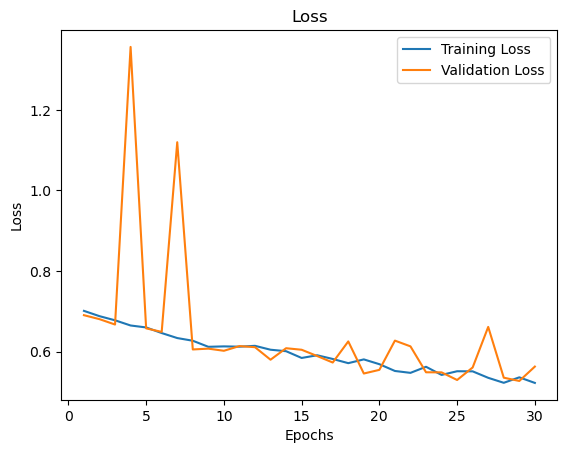

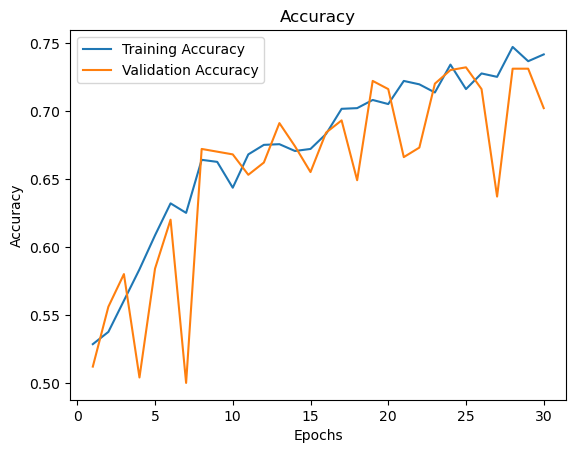

In [6]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Generar gráfica de pérdida
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
